In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
sns.set_style('ticks')
import re
import matplotlib.ticker as ticker
# Enable inline plotting  
%matplotlib inline

In [2]:
print ('Python version ' + sys.version)
print ('Pandas version ' + pd.__version__)
print ('Numpy version ' + np.__version__)

Python version 3.6.7 | packaged by conda-forge | (default, Feb 28 2019, 02:16:08) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.24.2
Numpy version 1.16.4


In [3]:
data_comet_S = 'dff-comm-updated-rmsd-traj-split.csv'
data_comet_SG = 'dff-comm-updated-rmsd-traj-split-GA.csv'
data_SuperMIC_S = 'dff-comm-updated-rmsd-traj-split-SuperMIC.csv'
data_SuperMIC_SG = 'dff-comm-updated-rmsd-traj-split-GA-SuperMIC.csv'

In [4]:
dff_comet_S = pd.read_csv(data_comet_S)
dff_comet_SG = pd.read_csv(data_comet_SG)
dff_SuperMIC_S = pd.read_csv(data_SuperMIC_S)
dff_SuperMIC_SG = pd.read_csv(data_SuperMIC_SG)

/Users/oliver/anaconda3/envs/mda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/Users/oliver/anaconda3/envs/mda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


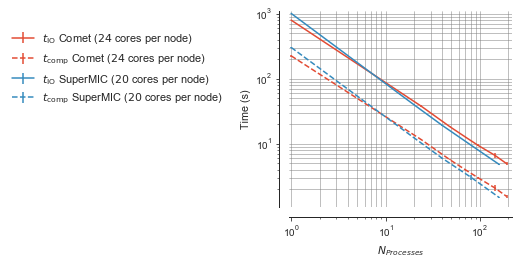

In [38]:
import matplotlib.patches as mpatches
from matplotlib.pyplot import *
import matplotlib

plt.rcParams['font.size'] = 9
fig = plt.figure(figsize=(4,4))
axes = fig.add_subplot(1,1,1)
width = 0.85 
#axes.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,8)))
# colors
color = {'comet': sns.color_palette()[0],
         'supermic': sns.color_palette()[1],
        }
style = {'t_IO': "-", 't_comp': "--"}

dff = [dff_comet_S, dff_comet_SG, dff_SuperMIC_S, dff_SuperMIC_SG]
labels = ['Comet ($24$ cores per node)',
          'Comet-GA ($24$ cores per node)',
          'SuperMIC ($20$ cores per node)',
          'SuperMIC-GA ($20$ cores per node)']

dff[0].index = dff[0].loc[:,'blocks']
dff[1].index = dff[1].loc[:,'blocks']
dff[2].index = dff[2].loc[:,'blocks']
dff[3].index = dff[3].loc[:,'blocks']

yerrs1 = [dff[0]['std_t_IO'].values.transpose().tolist(),dff[0]['std_t_comp'].values.transpose().tolist()]
dff[0].loc[:,'t_IO'].plot(yerr=yerrs1[0], 
                          linestyle=style["t_IO"],
                          color=color["comet"],
                          ax=axes)
dff[0].loc[:,'t_comp'].plot(yerr=yerrs1[1], 
                          linestyle=style["t_comp"],
                          color=color["comet"],
                          ax=axes)


#yerrs2 = [dff[1]['std_t_IO'].values.transpose().tolist(),dff[1]['std_t_comp'].values.transpose().tolist()]
#dff[1].loc[:,['t_IO','t_comp']].plot(yerr=yerrs2,ax=axes)

yerrs3 = [dff[2]['std_t_IO'].values.transpose().tolist(),dff[2]['std_t_comp'].values.transpose().tolist()]
dff[2].loc[:,'t_IO'].plot(yerr=yerrs3[0], 
                          linestyle=style["t_IO"],
                          color=color["supermic"],
                          ax=axes)
dff[2].loc[:,'t_comp'].plot(yerr=yerrs3[1], 
                          linestyle=style["t_comp"],
                          color=color["supermic"],
                          ax=axes)

#yerrs4 = [dff[3]['std_t_IO'].values.transpose().tolist(),dff[3]['std_t_comp'].values.transpose().tolist()]
#dff[3].loc[:,['t_IO','t_comp']].plot(yerr=yerrs4,ax=axes)

plt.style.use('ggplot')
sns.set_style('ticks')
axes.set_xlabel('$N_{Processes}$')   
axes.set_ylabel('Time (s)')
plt.xscale('log')
plt.yscale('log')

axes.set_ylim(0, 1100)
axes.set_xlim(0.95, 220)
axes.yaxis.grid(which='major', linewidth='0.5', color='grey')
axes.xaxis.grid(which='major', linewidth='0.5', color='grey')
axes.yaxis.grid(which='minor', linewidth='0.5', color='grey')
axes.xaxis.grid(which='minor', linewidth='0.5', color='grey')  
sns.despine(offset=10, ax=axes)
fig.subplots_adjust(bottom=0.2)
legends = [r'$t_\mathrm{IO}$ Comet ($24$ cores per node)',
           r'$t_\mathrm{comp}$ Comet ($24$ cores per node)',
           #r'$t_\mathrm{IO}$ Comet-GA ($24$ cores per node)',
           #r'$t_\mathrm{comp}$ Comet-GA ($24$ cores per node)',
           r'$t_\mathrm{IO}$ SuperMIC ($20$ cores per node)',
           r'$t_\mathrm{comp}$ SuperMIC ($20$ cores per node)',
           #r'$t_\mathrm{IO}$ SuperMIC-GA ($20$ cores per node)',
           #r'$t_\mathrm{comp}$ SuperMIC-GA ($20$ cores per node)'
          ]

lgd = plt.legend(legends,loc='upper right', fontsize=11, bbox_to_anchor=(-0.25, 0.95),frameon=False, shadow=True, ncol=1)
plt.tight_layout()

fig_name = 'Clusters_IO_compute_scaling_splitting'
fig.savefig('{}.pdf'.format(fig_name),bbox_extra_artists=(lgd,), bbox_inches='tight')

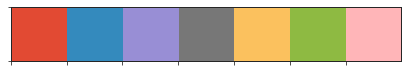

In [13]:
sns.palplot(sns.color_palette())